Vybraný target je thrombin - enzym koagulační kaskády (CHEMBL204, https://www.ebi.ac.uk/chembl/target_report_card/CHEMBL204/).

Set látek (chembl_thrombin_ic50.csv) vychází z hodnoty IC50 (3236 individuí).

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [2]:
import csv
with open('chembl_thrombin_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    rawdata = [x for x in reader]
rawdata[0]

OrderedDict([('Molecule ChEMBL ID', 'CHEMBL136755'),
             ('Molecule Name', ''),
             ('Molecule Max Phase', '0'),
             ('Molecular Weight', '530.65'),
             ('#RO5 Violations', '1'),
             ('AlogP', '0.19'),
             ('Compound Key', '19'),
             ('Smiles',
              'N=C(N)N1CCC(C(=O)NC[C@@H]2CCCN2C(=O)[C@H](CO)NS(=O)(=O)c2ccc3ccccc3c2)CC1'),
             ('Standard Type', 'IC50'),
             ('Standard Relation', "'='"),
             ('Standard Value', '110.0'),
             ('Standard Units', 'nM'),
             ('pChEMBL Value', '6.96'),
             ('Data Validity Comment', ''),
             ('Comment', ''),
             ('Uo Units', 'UO_0000065'),
             ('Ligand Efficiency BEI', '13.11'),
             ('Ligand Efficiency LE', '0.26'),
             ('Ligand Efficiency LLE', '6.77'),
             ('Ligand Efficiency SEI', '4.12'),
             ('Potential Duplicate', 'False'),
             ('Assay ChEMBL ID', 'CHEMBL77

In [3]:
print(rawdata[0]['Molecule ChEMBL ID'])
print(rawdata[0]['Smiles'])

CHEMBL136755
N=C(N)N1CCC(C(=O)NC[C@@H]2CCCN2C(=O)[C@H](CO)NS(=O)(=O)c2ccc3ccccc3c2)CC1


In [4]:
ligand_ids = [m['Molecule ChEMBL ID'] for m in rawdata]
ligand_mols = [Chem.MolFromSmiles(m['Smiles']) for m in rawdata]
len(ligand_ids), len(ligand_mols)

(3236, 3236)

In [5]:
[x for x in ligand_mols if not x]

[]

In [6]:
ligand_rings = [Chem.GetSSSR(ligand) for ligand in ligand_mols]
ligand_rings[0]

4

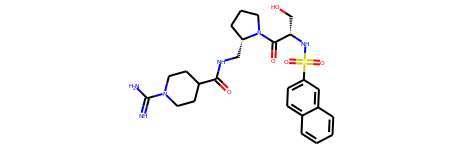

In [7]:
ligand_mols[0]

In [8]:
sum(ligand_rings)/len(ligand_mols)

3.431705809641533

Počet kruhů na molekulu v thrombinovém setu vychází na číslo 3,43, což je o více jak jeden kruh méně, než v případě ukázkového mTOR (4,68) a o dva méně, než v DrugBance (2,46).

Rozdíl thrombinu a mTOR může být zapříčiněn rozdílnou velikostí aktivního místa, kam se daný ligand váže. V případě DrugBank bych tipoval, že je to tím, že tento set obsahuje náhodný set léčiv, kde schází nějaké konkrétní společné zaměření a číslo 2,46 je prostě náhodná veličina, která vypadla z náhodného souboru dat.